# 相关分析

## 相关分析的意义

变量间的关系有两种类型：函数关系和相关关系。
- 函数关系是一一对应的确定关系
> 设有两个变量 $x$ 和 $y$ ，变量 $y$ 完全依赖于 $x$ ，则称  $y$ 是 $x$ 的函数，记为 $y = f (x)$，其中 $x$ 称为自变量，$y$ 称为因变量。

- 相关关系
    - 变量间确实存在、但数量上不固定的相互依存。这种关系不能用函数关系精确表达；
    - 一个变量的取值不能由另一个变量惟一地确定；当变量 x 取某个值时，与之相关的变量 y 的取值可能有若干个；
    - 各观测点分布在一条直线或曲线周围.


## 相关关系的测定

### 相关图
相关图也称为散点图。一对数据对应坐标图上一个点，将成对的观察数据表现为坐标图的散点而形成的图。
![png](./fig/13.png)

### python实现单个相关图

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_excel('./data/相关分析数据.xlsx', sheetname=1, index_col=0 )
data.head()

,hgrow,temp,rain,hsun,humi
1,0.01,4.2,17.0,54.5,81
2,0.50,7.4,10.8,73.8,79
3,1.50,10.0,17.4,84.7,75
4,10.80,16.1,19.7,137.0,75
5,13.00,21.1,248.7,149.6,77


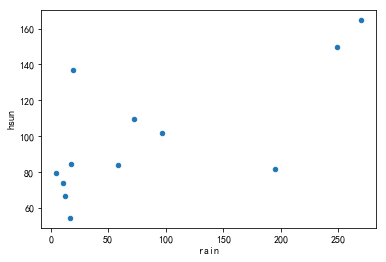

In [3]:
data.plot.scatter(*data.columns[2:4])

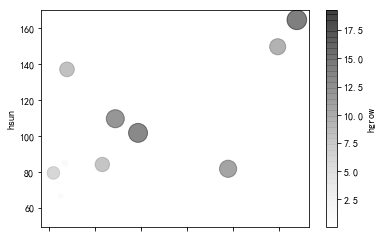

In [4]:
## 加入大小和颜色不同
data.plot.scatter(*data.columns[2:4],  c=data.columns[0], s=data.iloc[:,0]*20, alpha=0.5)

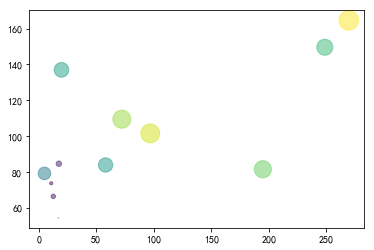

In [5]:
plt.scatter(data.iloc[:,2],data.iloc[:,3],c=data.iloc[:,0], s=data.iloc[:,0]*20, alpha=0.5)

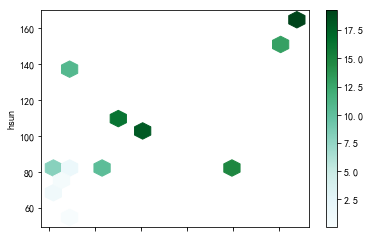

In [6]:
data.plot.hexbin(*data.columns[2:4],  C=data.columns[0], reduce_C_function=np.min,gridsize=15)

### 相关矩阵图

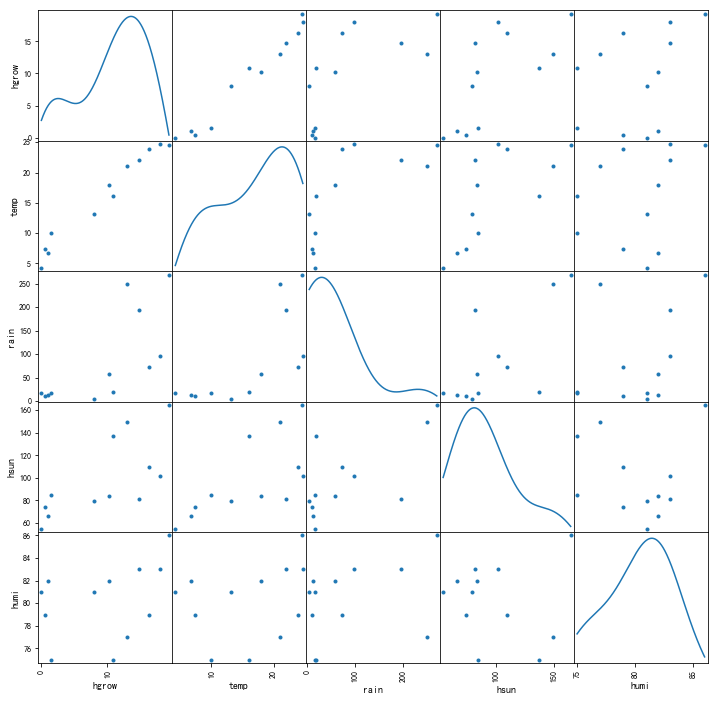

In [7]:
from pandas.tools.plotting import scatter_matrix
_ = scatter_matrix(data, alpha=1, figsize=(12, 12), diagonal='kde')

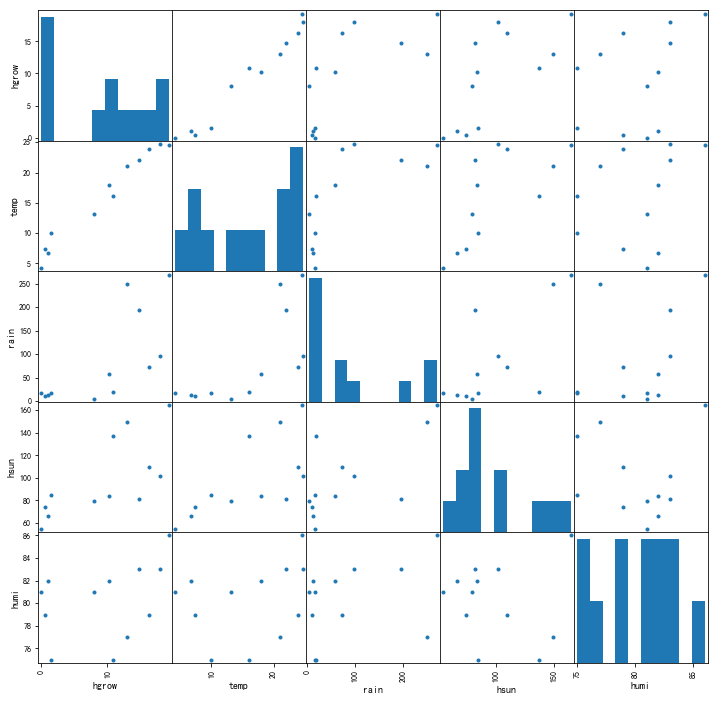

In [8]:
_ = scatter_matrix(data, alpha=1, figsize=(12, 12))

### 相关系数

#### Pearson相关系数
Pearson相关系数用来度量定距变量间的线性相关关系
$$ \rho = \frac{Cov(X, Y)}{\sigma_X \sigma_Y} = \frac{E(X-EX)(Y-EY)}{\sqrt{E(X-EX)^2E(Y-EY)^2}} \tag{1}$$


##### 相关系数取值及其意义
1. $r$ 的取值范围是 $[-1,1]$
2. $r <0$，为负线性相关；  $- r>0$ 为正线性相关
3. $|r|=1$，为完全相关
 - $r =1$，为完全正相关
 - $r =-1$，为完全负正相关
 - $r = 0$，不存在线性相关关系 


#### 相关系数的显著性检验——t 检验
检验的步骤为：
- 提出假设： $H_0: \rho=0; \; H_1: \rho \neq 0$
- 确定检验的统计量： $t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}} \sim t(n-2)$
- 计算检验统计量的值或 $P$ 值，确定显著性水平 $\alpha$，并作出决策：
    - 若 $\left|t \right| > t_{\alpha /  2}$，拒绝 $H_0$ (即总体线性相关显著)
    - 若 $\left|t \right| \leqslant  t_{\alpha /  2}$，拒绝 $H_0$ (即总体线性相关不显著)


#### Spearman等级相关系数
Spearman等级相关系数用来度量定序变量间的线性相关关系

##### 秩
将样本值从小到大排序,排列的序号称为相应数据的的秩,对相同的数据取序号的平均值作为秩

##### 计算公式
设 $(x_i, y_i)$ 的秩为 $(U_i, V_i)$， $i=1,2,\dots,n$

$$ r = 1 - \frac{6\sum_{i=1}^{n}D_{i}^{2}}{n(n^2-1)}, \: D_i=U_i-V_i \tag{2} $$

##### 性质
- 若两变量正相关性较强, $r$ 趋近于1；若两变量负相关性较强,$r$ 趋近于 $-1$
- 若两变量相关性较弱, $r$ 趋近于 $0$
- 若两变量完全正相关性,$r=1$；
    若两变量完全负相关性,$r=-1$


#### $Kendall \tau$ 相关系数
$Kendall \tau$ 是用非参数方法来度量定序变量间的线性相关关系


##### 一致
在样本 $(X_1,X_2,\dots,X_n)$ 和 $(Y_1,Y_2,\dots,Y_n)$ 中，如果 $(X_j-X_i)(Y_j-Y_i)>0$ 称 $(X_i,Y_i)$ 与 $(X_j,Y_j)$ 一致

##### 计算
$$ \tau = (U-V)\frac{2}{n(n-1)} \tag{3}$$

其中 $U$ 为一致对数目， $V$ 为非一致对数目


### python 计算相关系数

In [9]:
## pearson 系数
data.corr(method='pearson')

,hgrow,temp,rain,hsun,humi
hgrow,1.000000,0.983387,0.709370,0.704429,0.373573
temp,0.983387,1.000000,0.714821,0.690490,0.291983
rain,0.709370,0.714821,1.000000,0.701842,0.384326
hsun,0.704429,0.690490,0.701842,1.000000,-0.050938
humi,0.373573,0.291983,0.384326,-0.050938,1.000000


In [10]:
## Spearman 系数
data.corr(method='spearman')

,hgrow,temp,rain,hsun,humi
hgrow,1.000000,0.979021,0.839161,0.804196,0.402132
temp,0.979021,1.000000,0.818182,0.755245,0.412714
rain,0.839161,0.818182,1.000000,0.762238,0.342165
hsun,0.804196,0.755245,0.762238,1.000000,-0.095242
humi,0.402132,0.412714,0.342165,-0.095242,1.000000


In [11]:
## Kendall tau 系数
data.corr(method='kendall')

,hgrow,temp,rain,hsun,humi
hgrow,1.000000,0.909091,0.636364,0.636364,0.330965
temp,0.909091,1.000000,0.606061,0.606061,0.299445
rain,0.636364,0.606061,1.000000,0.515152,0.267924
hsun,0.636364,0.606061,0.515152,1.000000,-0.047281
humi,0.330965,0.299445,0.267924,-0.047281,1.000000


In [12]:
## 使用scipy更全面，可以给出p值
## pearson 系数
from scipy.stats import stats
stats.pearsonr(data.iloc[:,0], data.iloc[:,1])

(0.9833870788122121, 9.6920927647153237e-09)

In [13]:
## Spearman 系数
stats.spearmanr(data.iloc[:,0], data.iloc[:,1])

SpearmanrResult(correlation=0.97902097902097918, pvalue=3.0898013985487064e-08)

In [14]:
## Kendall tau 系数
stats.kendalltau(data.iloc[:,0], data.iloc[:,1])

KendalltauResult(correlation=0.90909090909090895, pvalue=3.8826726307417777e-05)

### 偏相关分析
在多要素所构成的系统中，先不考虑其它要素的影响，而单独研究两个要素之间的相互关系的密切程度，这称为偏相关。用以度量偏相关程度的统计量，称为偏相关系数。

#### 3个要素的偏相关系数

$$ r_{12\cdot3} = \frac{r_{12} - r_{13}r_{23}}{\sqrt{(1-r_{13}^2(1-r_{23}^2)}} \tag{4}$$

$$ r_{13\cdot2} = \frac{r_{13} - r_{12}r_{23}}{\sqrt{(1-r_{12}^2(1-r_{23}^2)}} \tag{5}$$

$$ r_{23\cdot1} = \frac{r_{23} - r_{12}r_{13}}{\sqrt{(1-r_{12}^2(1-r_{13}^2)}} \tag{6}$$

#### 性质
- 偏相关系数分布的范围在-1到1之间；
- 偏相关系数的绝对值越大，表示其偏相关程度越大；

#### 偏相关系数检验
- 假设： $H_0: \rho=0; \; H_1: \rho \neq 0$


- 统计量：$t = \frac{r}{\sqrt{1-r^2}}\sqrt{n-m-2} \sim t(n-m-2)$，$n$ 为样本数，$m$ 为阶数（控制变量个数）

### python 实现偏相关系数

In [15]:
## 由于python没有现成的偏相关函数调用，故写了一个调用
import numpy as np
from scipy import stats, linalg

def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
    
    C = np.asarray(C)
    C = np.column_stack([C, np.ones(C.shape[0])])
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p-1):
        P_corr[i, i] = 1
        for j in range(i, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr[:-1,:-1]

In [16]:
data2 = pd.read_excel('./data/相关分析数据.xlsx', sheetname='data10-03', index_col=0 )
data2.head()

,hgrow,temp,rain,hsun,humi
1,0.01,4.2,17.0,54.5,81
2,0.50,7.4,10.8,73.8,79
3,1.50,10.0,17.4,84.7,75
4,10.80,16.1,19.7,137.0,75
5,13.00,21.1,248.7,149.6,77


In [17]:
## 计算偏相关性
p = partial_corr(data)
data3 = pd.DataFrame(p, columns=data.columns, index=data.columns)
data3

,hgrow,temp,rain,hsun,humi
hgrow,1.000000,0.977408,-0.490567,0.631829,0.731011
temp,0.977408,1.000000,0.525396,-0.543962,-0.676731
rain,-0.490567,0.525396,1.000000,0.691587,0.647965
hsun,0.631829,-0.543962,0.691587,1.000000,-0.746468
humi,0.731011,-0.676731,0.647965,-0.746468,1.000000
